In [388]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Background

The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. This is from a 2015 survey

The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. 
The features consist of some demographics, lab test results, and answers to survey questions for each patient. 
The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy.

diabetes _ binary _ 5050split _ health _ indicators _ BRFSS2015.csv is a clean dataset of 70,692 survey responses to the CDC's BRFSS2015. It has an equal 50-50 split of respondents with no diabetes and with either prediabetes or diabetes. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is balanced.


In [392]:
diabetes_df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [394]:
diabetes_df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [396]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

# Data Visualization

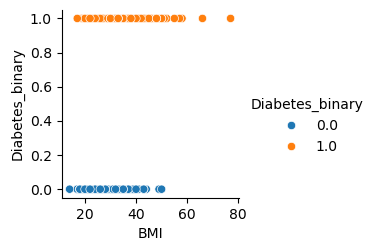

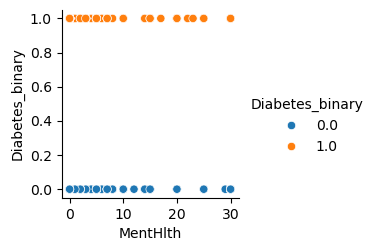

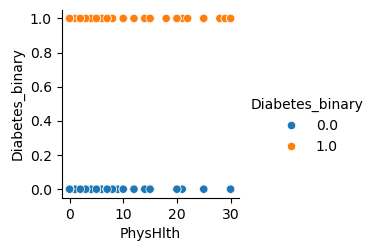

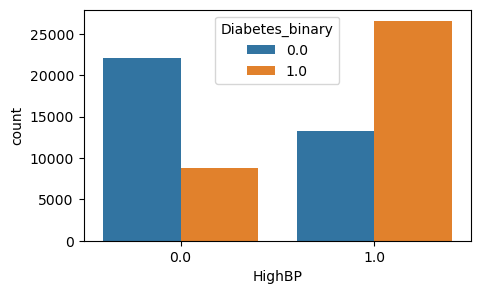

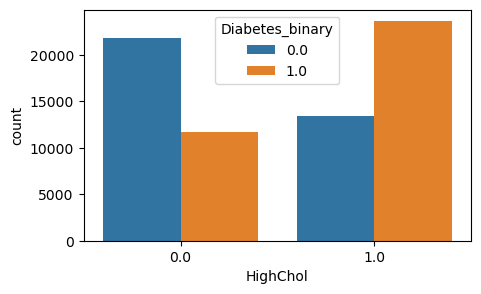

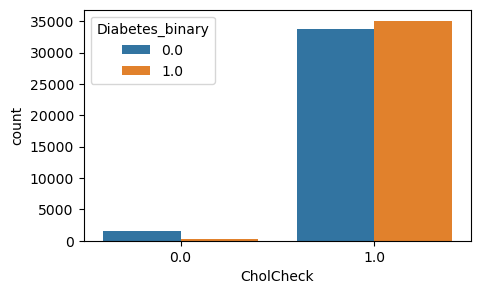

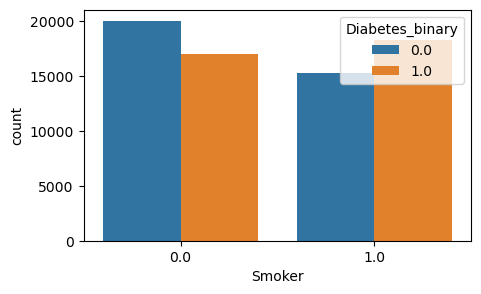

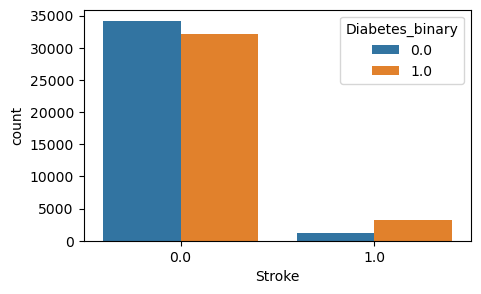

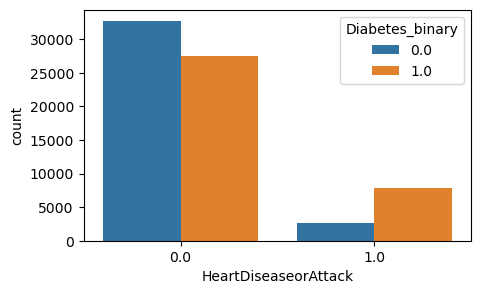

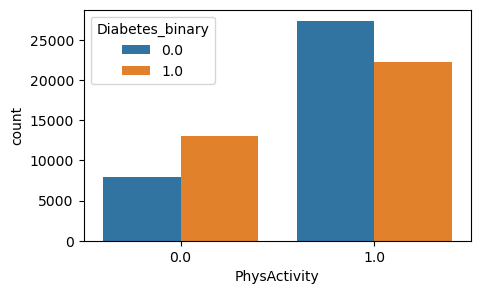

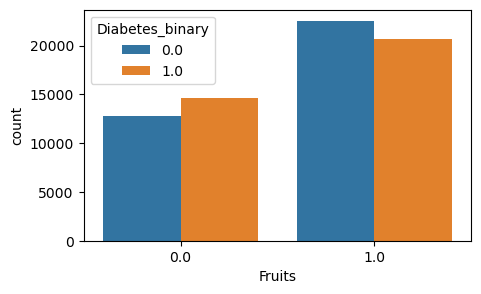

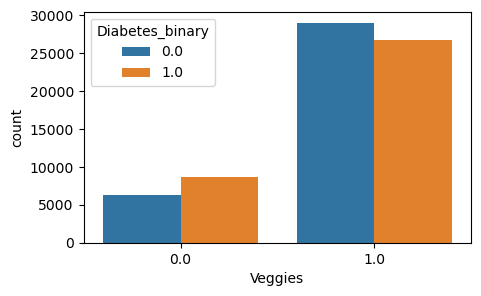

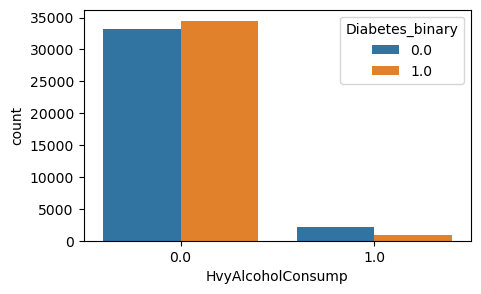

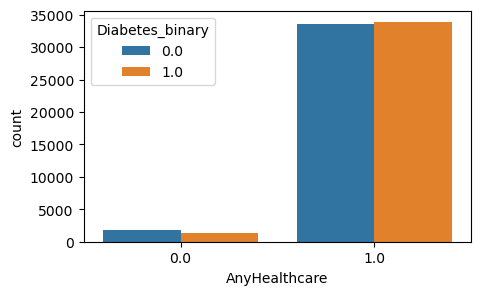

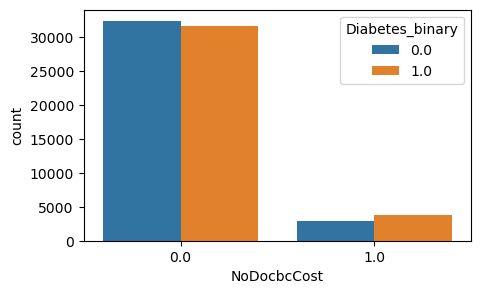

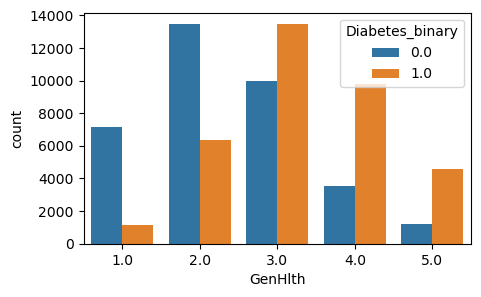

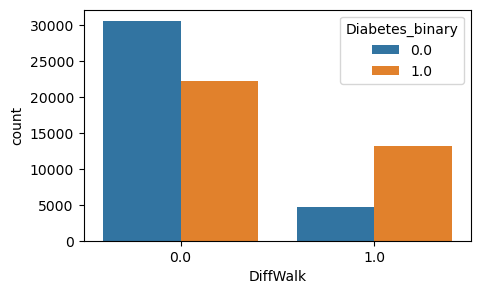

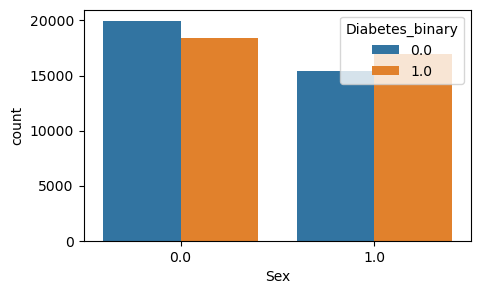

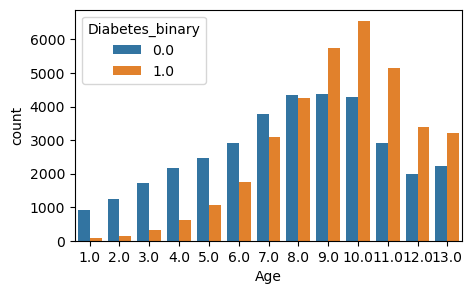

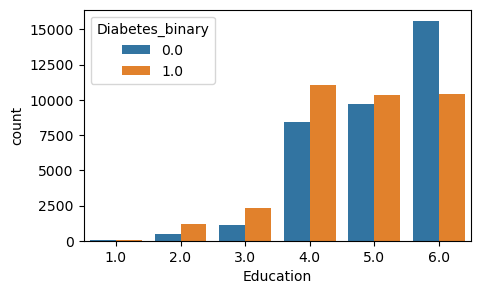

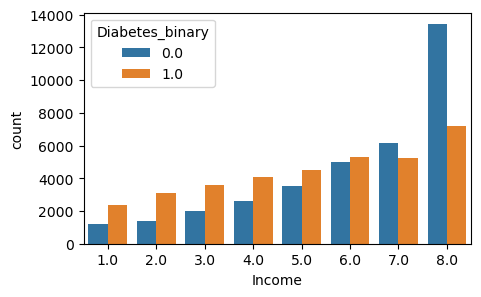

In [399]:
rng = np.random.RandomState(0)
indices = rng.choice(np.arange(len(diabetes_df)), size=900, replace=False)


sns.pairplot(data=diabetes_df.iloc[indices], hue='Diabetes_binary', x_vars= diabetes_df.columns[4], y_vars='Diabetes_binary')
plt.show()

sns.pairplot(data=diabetes_df.iloc[indices], hue='Diabetes_binary', x_vars= diabetes_df.columns[15], y_vars='Diabetes_binary')
plt.show()

sns.pairplot(data=diabetes_df.iloc[indices], hue='Diabetes_binary', x_vars= diabetes_df.columns[16], y_vars='Diabetes_binary')
plt.show()


for i in range(1, len(diabetes_df.columns)):
    #exclude BMI, mental health and physical health
    if i == 4 or i == 15 or i == 16:
        continue
        
    plt.figure(figsize=(5,3))
    sns.countplot(data=diabetes_df, x=diabetes_df.columns[i], hue="Diabetes_binary")
    plt.show()
    

# Data Pre Processing

In [402]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# X = diabetes_df.drop(columns = ['Diabetes_binary'])
X = diabetes_df.drop(columns = ['Diabetes_binary', 'Veggies', 'Fruits'])

y = diabetes_df['Diabetes_binary']

X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2, random_state=42)

st_scalar = StandardScaler()
X_trn = st_scalar.fit_transform(X_trn)
X_tst = st_scalar.transform(X_tst)





# Model 1: Naive Bayes

In [405]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

nb_model = BernoulliNB()
# nb_model = GaussianNB()

nb_model.fit(X_trn, y_trn)

ynb_hat = nb_model.predict(X_tst)

# Model 2: Logistic Regression

In [408]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_trn, y_trn)

ylr_hat = lr_model.predict(X_tst)



# Metrics

In [411]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


print("------Naive Bayes------")
acc_nb = accuracy_score(y_tst, ynb_hat)
print(f"Accuracy = {acc_nb}")

cnb_matrix = confusion_matrix(y_tst, ynb_hat)
print(cnb_matrix)



print("\n------Logistic Regression------")
acc_lr = accuracy_score(y_tst, ylr_hat)
print(f"Accuracy = {acc_lr}")

clr_matrix = confusion_matrix(y_tst, ylr_hat)
print(clr_matrix)



------Naive Bayes------
Accuracy = 0.731734917603791
[[5169 1921]
 [1872 5177]]

------Logistic Regression------
Accuracy = 0.7485677912157861
[[5144 1946]
 [1609 5440]]
